In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df=df.drop(['phone','url','address','menu_item'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [5]:
df.isnull().sum()


name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [7]:
df.rename(columns = {'rate':'Rate','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'name':'Restaurant_Name','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'online_order':'Online_order','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'book_table':'Book_table','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'votes':'Votes','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'location':'Location','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'rest_type':'Rest_type','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'dish_liked':'Dish_liked','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'cuisines':'Cuisines','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'approx_cost(for two people)':'Cost','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'reviews_list':'Reviews_list','listed_in(type)':'Type'},inplace=True)
df.rename(columns = {'listed_in(city)':'Listed_in(city)','listed_in(type)':'Type'},inplace=True)

In [8]:
df.head()

,Restaurant_Name,Online_order,Book_table,Rate,Votes,Location,Rest_type,Dish_liked,Cuisines,Cost,Reviews_list,Type,Listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [9]:
df.isnull().sum()

Restaurant_Name        0
Online_order           0
Book_table             0
Rate                7775
Votes                  0
Location              21
Rest_type            227
Dish_liked         28078
Cuisines              45
Cost                 346
Reviews_list           0
Type                   0
Listed_in(city)        0
dtype: int64

In [10]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Restaurant_Name    0
Online_order       0
Book_table         0
Rate               0
Votes              0
Location           0
Rest_type          0
Dish_liked         0
Cuisines           0
Cost               0
Reviews_list       0
Type               0
Listed_in(city)    0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.Rate


0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51705    3.8 /5
51707    3.9 /5
51708    2.8 /5
51711    2.5 /5
51715    4.3 /5
Name: Rate, Length: 23394, dtype: object

In [13]:
df_rate=lambda x: str(x).split('/')[0]
df.Rate=df.Rate.apply(df_rate)
df['Rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rate, dtype: object

In [14]:
df.Cost

0          800
1          800
2          800
3          300
4          600
         ...  
51705    1,200
51707    2,000
51708    1,200
51711      800
51715    2,500
Name: Cost, Length: 23394, dtype: object

In [15]:
df['Cost']=df['Cost'].astype(str)
df['Cost']=df['Cost'].apply(lambda x:x.replace(',','.'))
df['Cost']=df['Cost'].astype(float)
df['Cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64

In [16]:
df['Cost'] = df['Cost'].astype(str)
df['Cost'] = df['Cost'].apply(lambda x: x.replace(',','.'))
df['Cost'] = df['Cost'].astype(float)
df['Cost'] = df['Cost'].apply(lambda x: x/2)
df['Cost'].head()

0    400.0
1    400.0
2    400.0
3    150.0
4    300.0
Name: Cost, dtype: float64

In [17]:
df.dtypes

Restaurant_Name     object
Online_order        object
Book_table          object
Rate                object
Votes                int64
Location            object
Rest_type           object
Dish_liked          object
Cuisines            object
Cost               float64
Reviews_list        object
Type                object
Listed_in(city)     object
dtype: object

In [18]:
def handle_Rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df['Rate']=df['Rate'].apply(handle_Rate)
df['Rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rate, dtype: float64

In [19]:
df.head()

,Restaurant_Name,Online_order,Book_table,Rate,Votes,Location,Rest_type,Dish_liked,Cuisines,Cost,Reviews_list,Type,Listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


**Data Visualisation**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

**1.Restaurants delivering online or not**

Text(0.5, 1.0, 'Restaurants delivering Online or not')

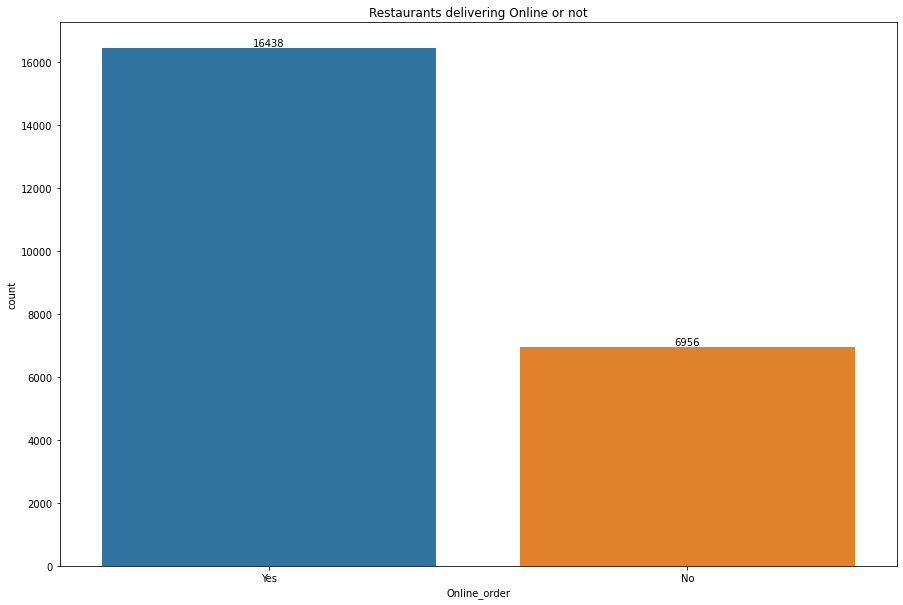

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Online_order', data = df,ax=ax)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Restaurants delivering Online or not')

**2.Restaurants allowing table booking or not**

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

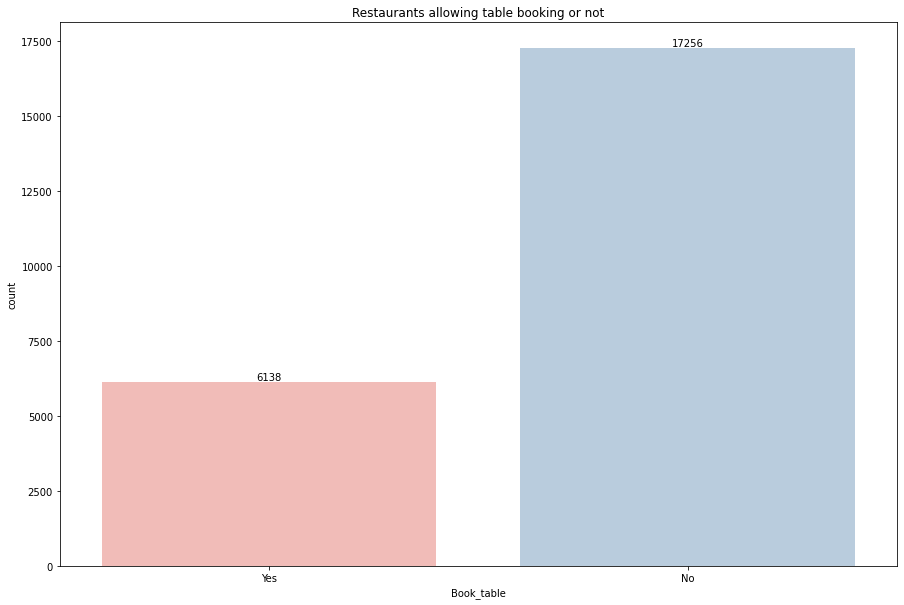

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Book_table', data = df,palette="Pastel1",ax=ax,)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Restaurants allowing table booking or not')


([<matplotlib.patches.Wedge at 0x7f1ac7589c90>,
 [Text(-1.493995948629078, 1.6149229410346186, 'No'),
  Text(1.4939957974290727, -1.614923080912608, 'Yes')],
 [Text(-0.814906881070406, 0.8808670587461556, '74%'),
  Text(0.8149067985976759, -0.8808671350432408, '26%')])

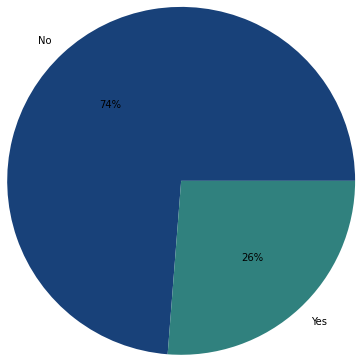

In [23]:
colors = sns.color_palette('gist_earth')[0:5]
yn = df['Book_table'].value_counts()
plt.pie(yn.values,labels = yn.index,radius=2,autopct='%.0f%%',colors=colors)

**3.Table booking Rate VS Rate**

In [24]:
pd.set_option("display.max.rows", None)
c = df.groupby('Location')['Rate','Cost'].mean()
loc_df = pd.DataFrame(c)
loc_df['Count'] = df['Location'].value_counts()
loc_df.sort_values(by=['Count', 'Rate'],ascending=False).head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Rate,Cost,Count
Location,,,
Koramangala 5th Block,4.151351,190.719900,1799
BTM,3.766168,216.129723,1482
Indiranagar,3.963838,184.254741,1371
HSR,3.839573,224.227230,1177
Jayanagar,3.935189,214.632427,1067
JP Nagar,3.851662,201.217843,1020
Whitefield,3.823077,181.022665,835
Koramangala 7th Block,3.991984,211.728696,744
Koramangala 6th Block,3.946694,187.186364,726


In [25]:
df.head()

,Restaurant_Name,Online_order,Book_table,Rate,Votes,Location,Rest_type,Dish_liked,Cuisines,Cost,Reviews_list,Type,Listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


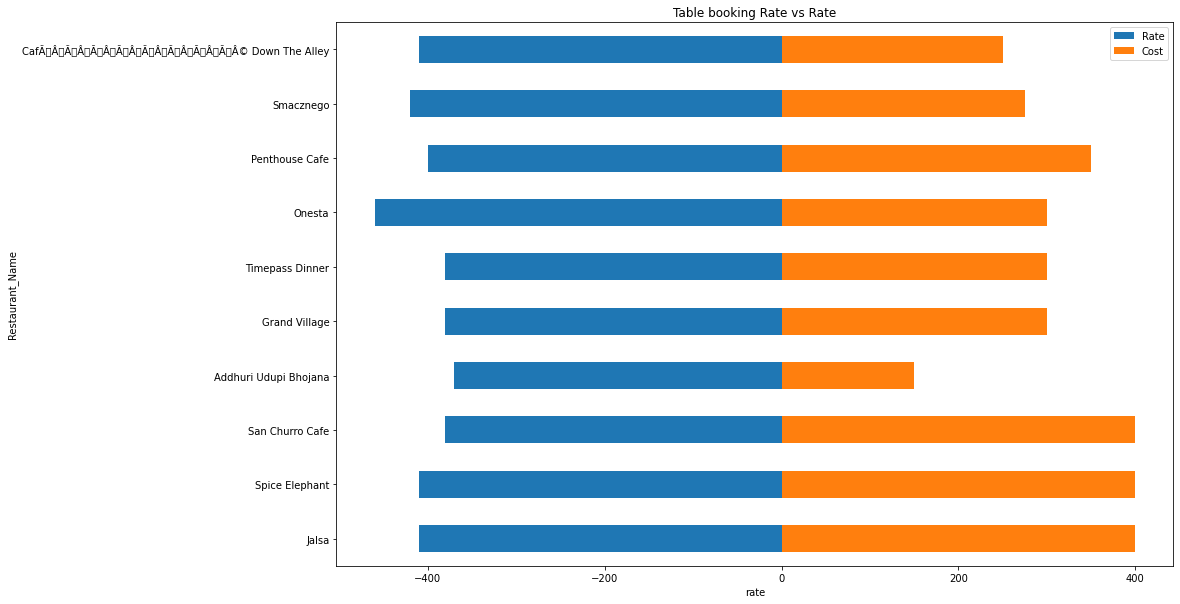

In [26]:
# changing rate value for better visualiation
df.Rate=df.Rate*-100

df.iloc[:10].plot.barh(x='Restaurant_Name', y=['Rate','Cost'],
             title='Table booking Rate vs Rate',figsize=(15, 10),stacked=True)
plt.xlabel("rate")
for i in ax.containers:
    ax.bar_label(i)

    
# changing rate value to the original
df.Rate=df.Rate/-100

In [27]:
# checking rate value to the original
df.Rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rate, dtype: float64

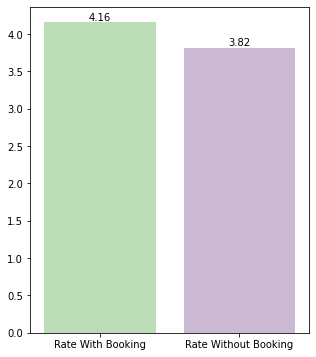

In [28]:
Yes = round(df[df['Book_table'] == 'Yes']['Rate'].mean(), 2)
No = round(df[df['Book_table'] == 'No']['Rate'].mean(), 2)
lable = {'Rate With Booking':[Yes],'Rate Without Booking':[No]}
relation =pd.DataFrame.from_dict(lable)

fig , ax = plt.subplots(figsize=(5,6))
sns.barplot(data = relation, palette = 'PRGn_r')
ax.set_xticklabels( ax.get_xticklabels())
for i in ax.containers:
    ax.bar_label(i)

In [29]:
df.head()

,Restaurant_Name,Online_order,Book_table,Rate,Votes,Location,Rest_type,Dish_liked,Cuisines,Cost,Reviews_list,Type,Listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


**4.Best Location**

In [30]:
pd.set_option("display.max.rows", None)
c = df.groupby('Location')['Rate'].mean()
loc_df = pd.DataFrame(c)
loc_df['Count'] = df['Location'].value_counts()
loc_df.sort_values(by=['Count', 'Rate'],ascending=False).head(10)

,Rate,Count
Location,,
Koramangala 5th Block,4.151351,1799
BTM,3.766168,1482
Indiranagar,3.963838,1371
HSR,3.839573,1177
Jayanagar,3.935189,1067
JP Nagar,3.851662,1020
Whitefield,3.823077,835
Koramangala 7th Block,3.991984,744
Koramangala 6th Block,3.946694,726


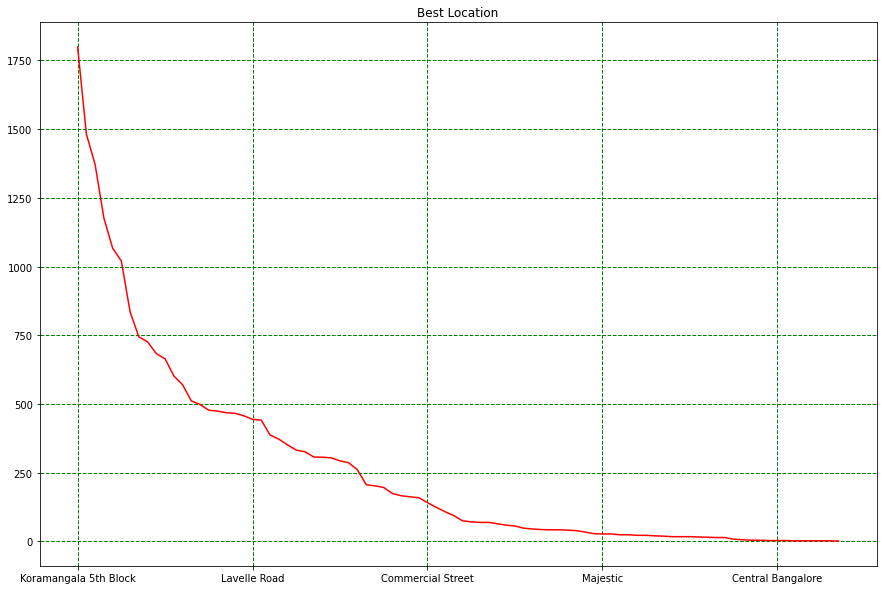

In [31]:
df['Location'].value_counts()[:].plot(kind='line',figsize=(15, 10),color='red',title='Best Location').grid(color = 'green', linestyle = '--', linewidth = 1)

**5.Relation between Location and Rating**

In [32]:
df.head()

,Restaurant_Name,Online_order,Book_table,Rate,Votes,Location,Rest_type,Dish_liked,Cuisines,Cost,Reviews_list,Type,Listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


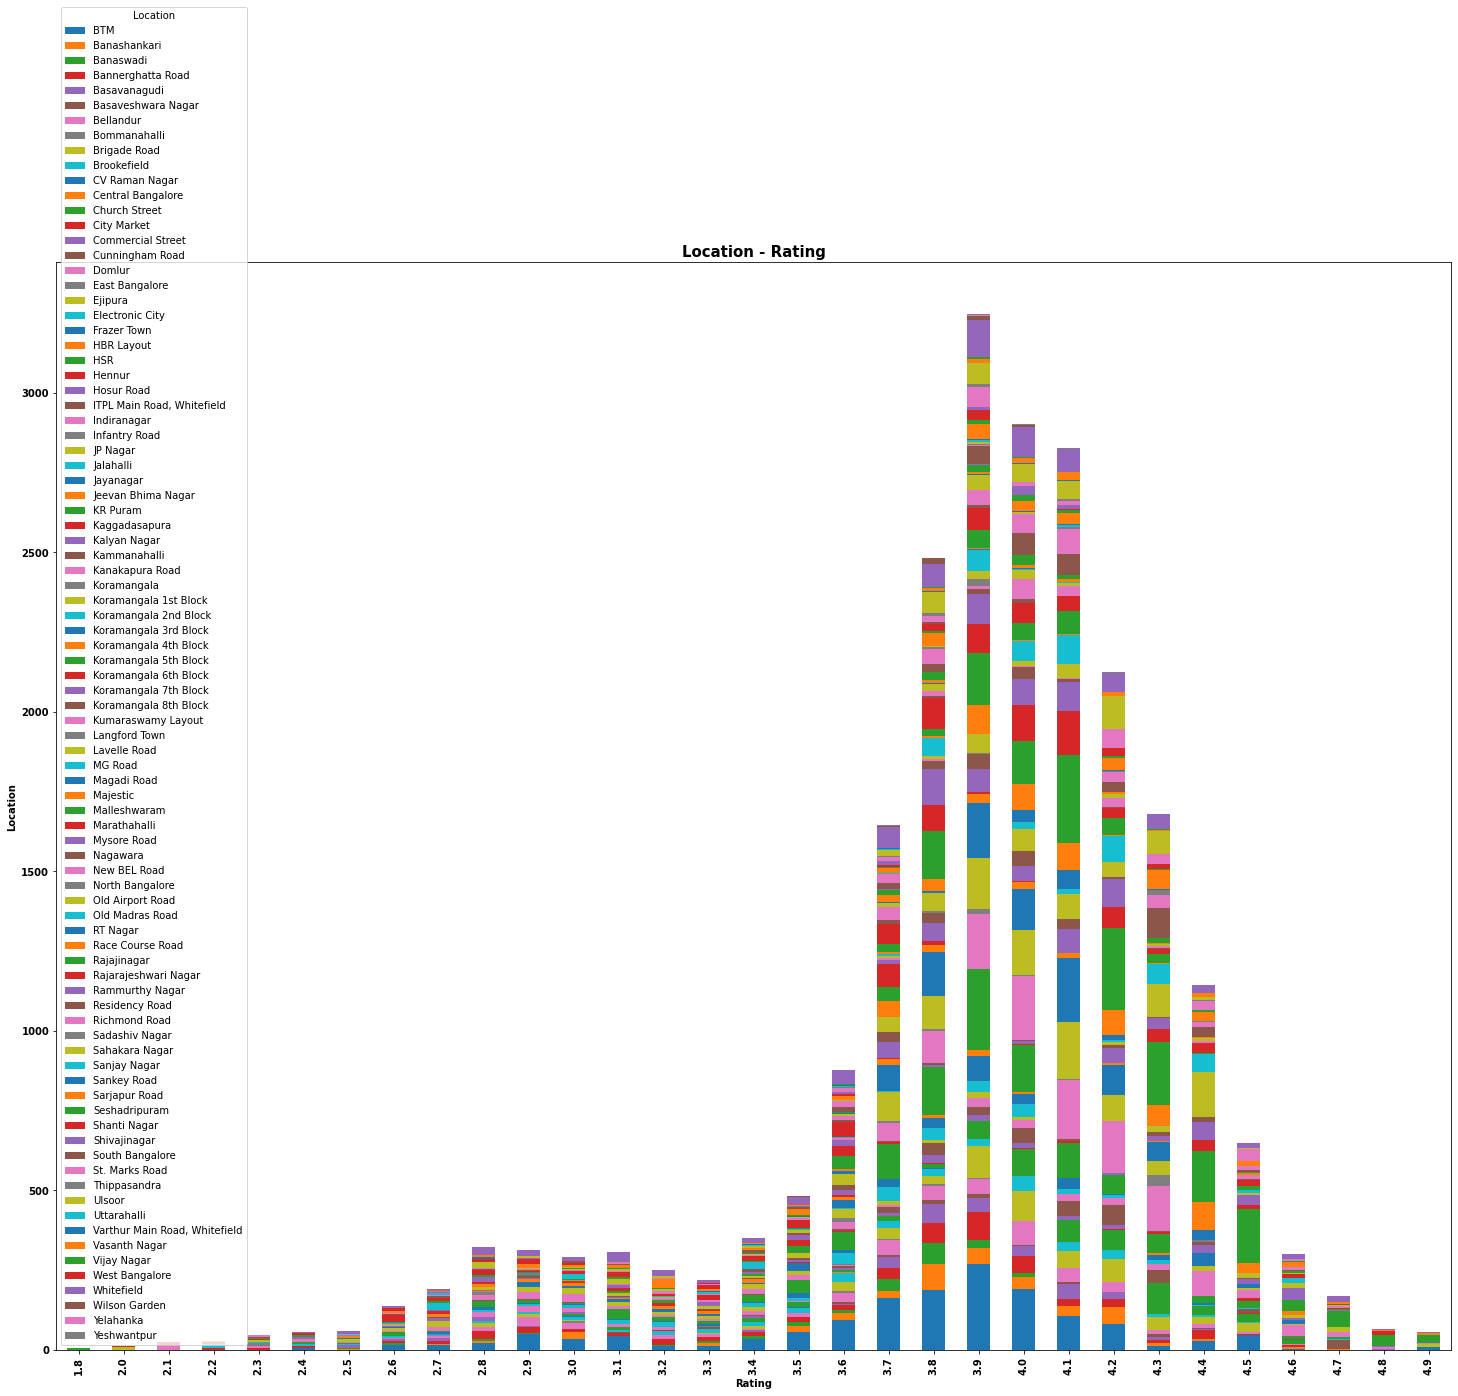

In [33]:
landr=pd.crosstab(df['Rate'],df['Location'])
landr.plot(kind='bar',stacked=True,figsize=(25, 20));
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

**6.Restaurant Type**

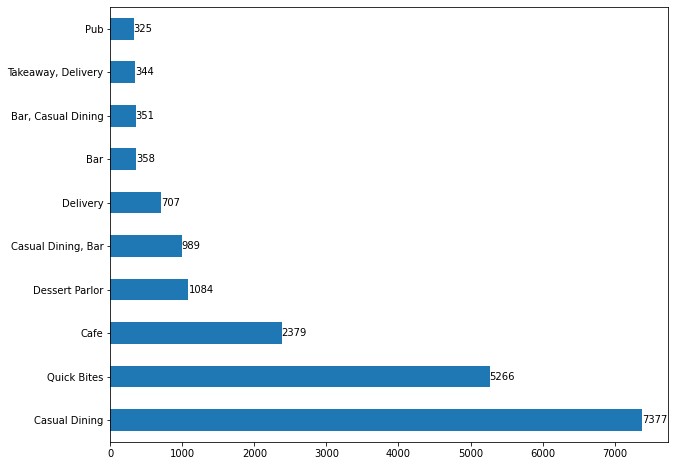

In [34]:
fig , ax = plt.subplots(figsize=(10,8))
df['Rest_type'].value_counts().head(10).plot(kind="barh")
for i in ax.containers:
    ax.bar_label(i)

**7.Gaussian Restaurant Type and Rating**

In [35]:
a=df['Rest_type'].unique()
print(a)
b= df['Rate'].min()
print(b)

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Delivery' 'Dessert Parlor' 'Pub'
 'Beverage Shop' 'Bar' 'Takeaway, Delivery' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Pub, Casual Dining' 'Casual Dining, Bar'
 'Bakery' 'Sweet Shop' 'Dessert Parlor, Beverage Shop'
 'Beverage Shop, Quick Bites' 'Microbrewery, Casual Dining'
 'Sweet Shop, Quick Bites' 'Lounge' 'Food Court' 'Cafe, Bakery'
 'Microbrewery' 'Kiosk' 'Pub, Bar' 'Casual Dining, Pub'
 'Cafe, Quick Bites' 'Lounge, Bar' 'Bakery, Quick Bites'
 'Dessert Parlor, Quick Bites' 'Bar, Casual Dining'
 'Beverage Shop, Dessert Parlor' 'Casual Dining, Microbrewery' 'Mess'
 'Lounge, Casual Dining' 'Cafe, Dessert Parlor' 'Dessert Parlor, Cafe'
 'Bakery, Dessert Parlor' 'Quick Bites, Sweet Shop' 'Takeaway'
 'Microbrewery, Pub' 'Club' 'Fine Dining' 'Bakery, Cafe'
 'Beverage Shop, Cafe' 'Pub, Cafe' 'Casual Dining, Irani Cafee'
 'Food Court, Quick Bites' 'Quick Bites, Beverage Shop'
 'Fine D

In [36]:
df.dtypes

Restaurant_Name     object
Online_order        object
Book_table          object
Rate               float64
Votes                int64
Location            object
Rest_type           object
Dish_liked          object
Cuisines            object
Cost               float64
Reviews_list        object
Type                object
Listed_in(city)     object
dtype: object

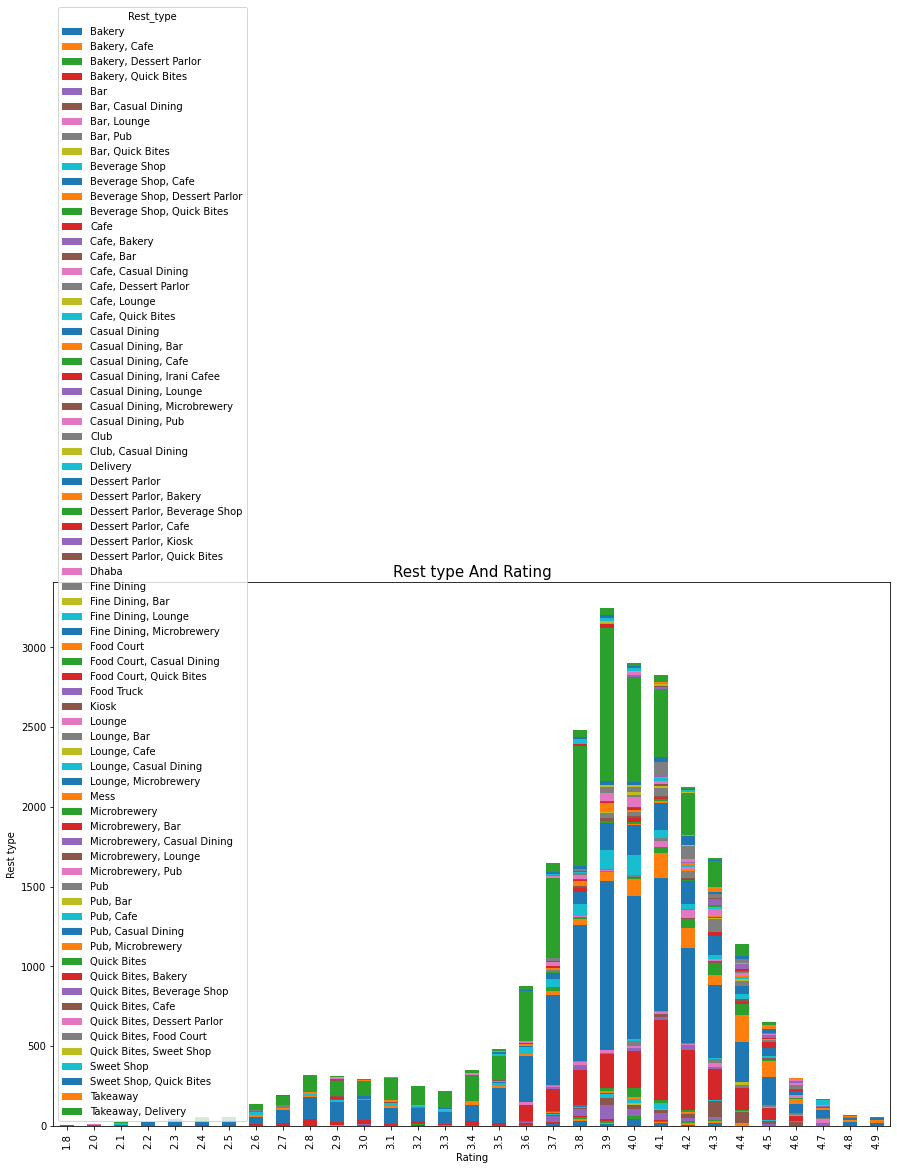

In [48]:
loc_plt=pd.crosstab(df['Rate'],df['Rest_type'])
loc_plt.plot(kind='bar',stacked=True,figsize=(15,10));
plt.title('Rest type And Rating',fontsize=15)
plt.ylabel('Rest type',fontsize=10)
plt.xlabel('Rating',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

## **8.Types of Services**

Text(0.5, 1.0, 'Type of Service')

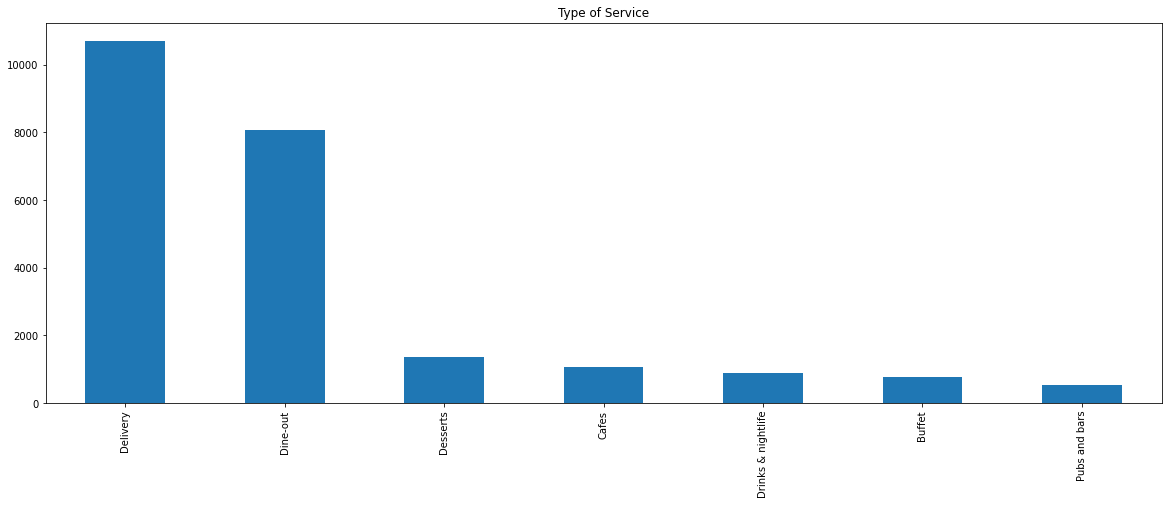

In [46]:
df['Type'].value_counts()[:].plot(kind='bar',figsize=(20,7))
plt.title('Type of Service')

**9.Relation between Type and Rating**

Text(0.5, 1.0, 'Relation between Type and Rating')

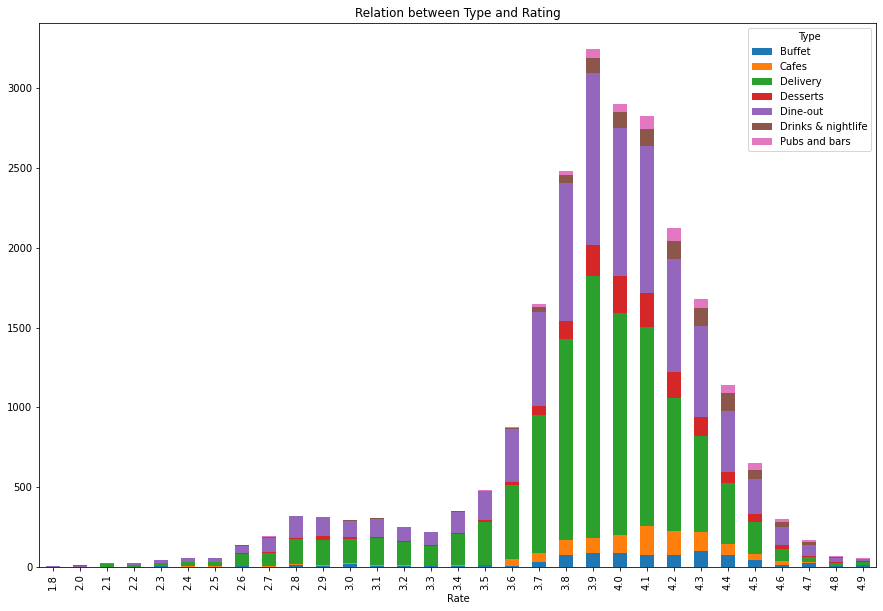

In [39]:
type_plt=pd.crosstab(df['Rate'],df['Type'])
type_plt.plot(kind='bar',stacked=True,figsize=(15,10));
plt.title('Relation between Type and Rating')

**10.Cost of Restaurant**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

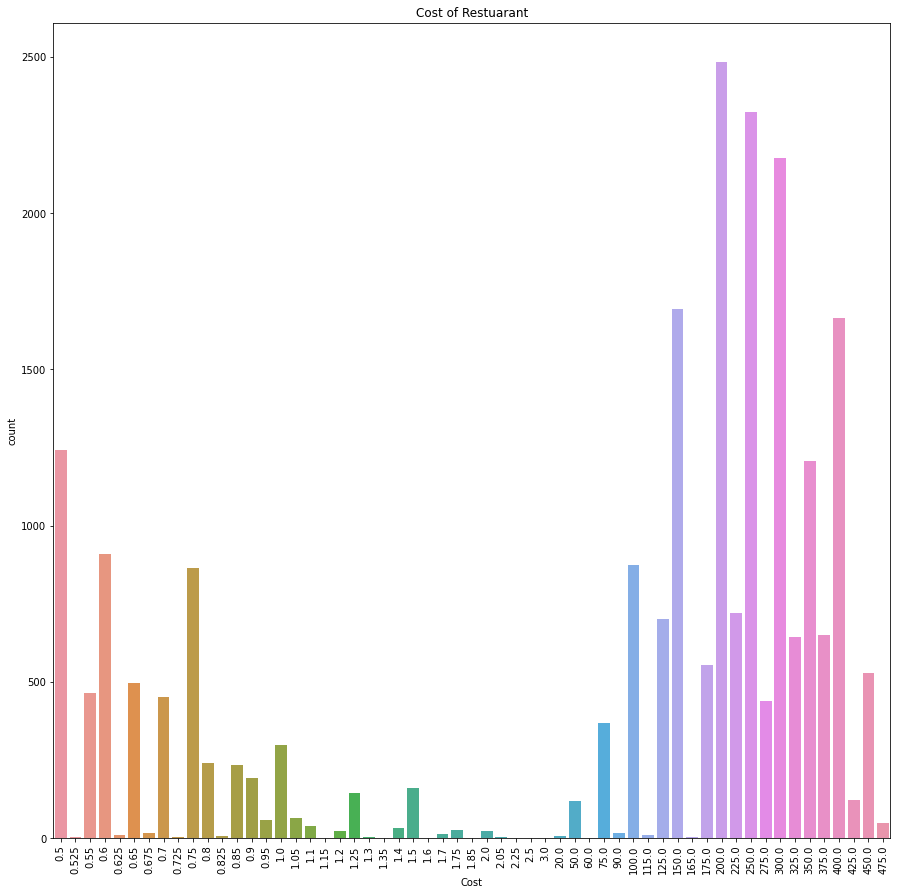

In [40]:
sns.countplot(df['Cost'])
sns.countplot(df['Cost']).set_xticklabels(sns.countplot(df['Cost']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

**11.No. of restaurants in a Location**

Text(0.5, 1.0, 'NO. of restaurants in a Location')

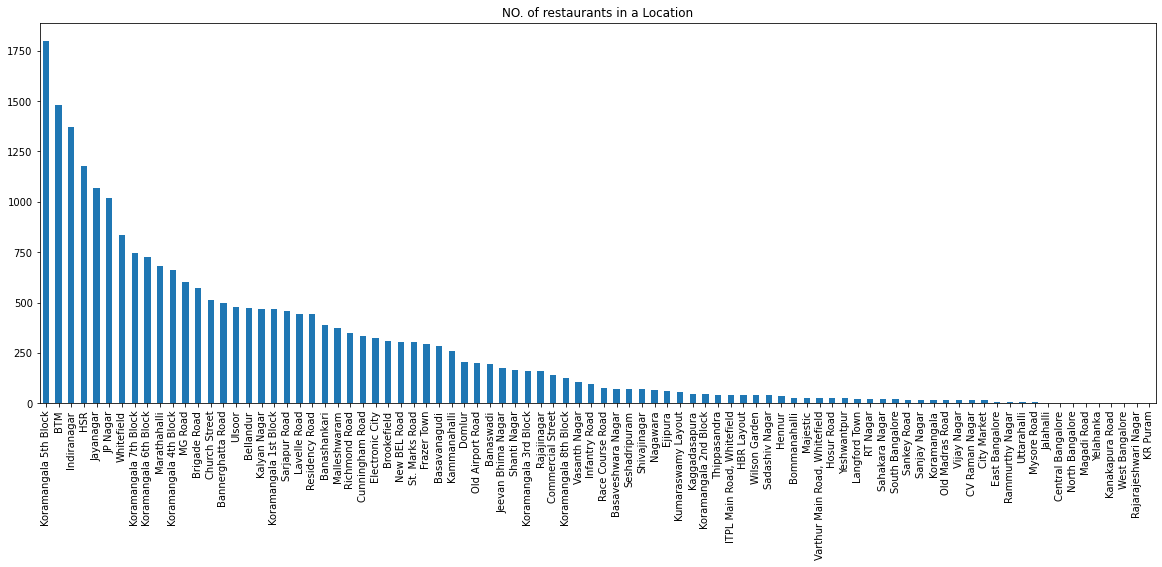

In [41]:
df['Location'].value_counts()[:].plot(kind='bar',figsize=(20,7))
plt.title('NO. of restaurants in a Location')

**12.Restaurant Type**

<AxesSubplot:>

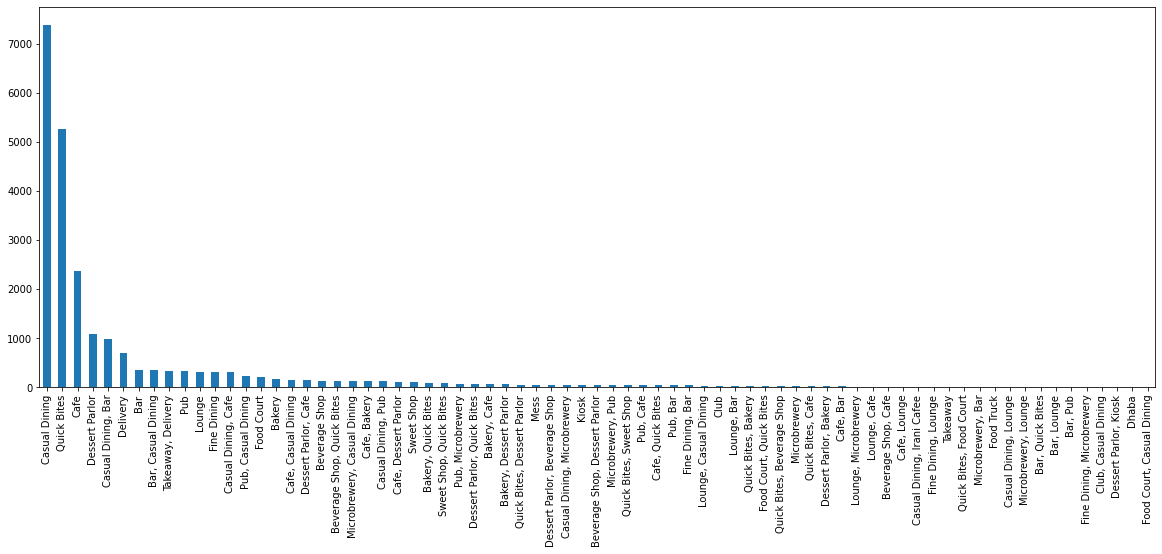

In [47]:
df['Rest_type'].value_counts()[:].plot(kind='bar',figsize=(20,7))

**13.Most famous restaurant chains in Bengaluru**

Text(0, 0.5, 'Restaurant_Name')

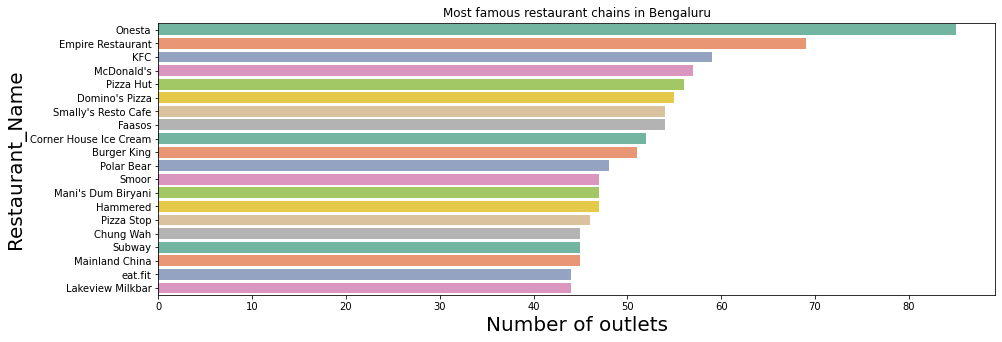

In [44]:
plt.figure(figsize=(15,5))
q=df['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=q,y=q.index,palette='Set2')
plt.title("Most famous restaurant chains in Bengaluru")
plt.xlabel("Number of outlets",size=20)
plt.ylabel("Restaurant_Name",size=20)

**Inferences**

**Write down the inferences about what you have learned from the dataset. i.e. Making sense of the data.**


1. There are more restaurant dilivering online.
2. Yet, less numner of restaurant allow to book table prior
3. Tho onesta has high stars in rate the cost is comperatively low
4. The best location is BTM with rate of 3.290618 and count of 4210
5. On an avg most of the restaurant has 3.9 of rating
6. There are less no. of bars and more no. of quick bytes
7. Restaurants are more focusing on delevering food
8. The max cost is 300 per head, avg is 150 and min is 20
9. There are more than 4000 restaurant in BTM
10. There are more than 14500 restaurant which provides quick byte
11. Most famous restaurant chains in Bengaluru is CCD Cafe Coffee Day

**What different problems we can solve through the dataset.**
1. problems such as
2. Which restaurant is most costly
3. Which restaurant has more outlet
4. Which restaurant needs to improve in their services
5. Which restaurant can be the most crouded
6. Which location has most no of restaurant
7. etc...